Perfroming ML methods on GDT_TS prediction

In [1]:
import pandas as pd
import random
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
!pip install pytorch-tabnet
from pytorch_tabnet.tab_model import TabNetRegressor
import math
np.random.seed(42)
random.seed(42)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 848.3 kB/s eta 0:00:00


In [6]:
CASP15_csv = pd.read_csv('CASP15_global_error.csv')

In [7]:
CASP15_csv

,AL0_P,TM-score,TM-align,AL4_P,QCS,Z-score,Handed.,SS,DFM,GDT_TS
0,77.78,0.794,0.797,88.89,87.09,7.43,0.91,0.463,0.17,76.92
1,36.47,0.410,0.444,41.76,53.52,2.81,0.91,0.520,0.37,38.38
2,72.17,0.888,0.893,87.39,97.86,12.90,0.94,0.650,0.09,70.54
3,95.50,0.921,0.924,98.20,97.10,8.25,0.95,0.678,0.04,91.89
4,57.27,0.571,0.569,64.55,67.85,3.86,0.92,0.462,0.22,55.45
...,...,...,...,...,...,...,...,...,...,...
3999,95.50,0.929,0.932,98.20,97.33,8.25,0.95,0.694,0.04,92.57
4000,95.93,0.972,0.972,96.83,99.00,10.91,0.97,0.780,0.05,96.49
4001,95.50,0.943,0.946,98.20,97.77,8.25,0.96,0.698,0.04,95.05
4002,0.00,0.388,0.405,0.00,26.25,0.84,0.80,0.204,0.32,48.33


In [8]:
X = CASP15_csv.drop('GDT_TS', axis=1)
y = CASP15_csv['GDT_TS']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)

In [10]:
X_test

,AL0_P,TM-score,TM-align,AL4_P,QCS,Z-score,Handed.,SS,DFM
682,80.84,0.806,0.815,82.63,90.40,8.01,0.87,0.624,0.57
2771,95.50,0.936,0.940,98.20,97.47,8.25,0.96,0.672,0.04
2073,75.43,0.901,0.909,87.39,97.29,13.17,0.94,0.685,0.08
1163,95.93,0.967,0.967,96.38,98.16,10.91,0.97,0.742,0.06
3731,33.64,0.394,0.403,44.55,38.06,1.13,0.79,0.347,0.86
...,...,...,...,...,...,...,...,...,...
621,58.68,0.674,0.707,71.26,87.21,5.44,0.92,0.551,0.07
1454,0.00,0.388,0.405,0.00,26.25,0.84,0.80,0.204,0.32
3358,97.01,0.946,0.946,99.40,98.21,10.18,0.97,0.702,0.02
1740,95.93,0.965,0.965,96.38,98.23,10.91,0.97,0.757,0.06


In [11]:
y_test

682     77.84
2771    93.92
2073    79.56
1163    95.59
3731    38.86
        ...  
621     58.53
1454    48.33
3358    91.77
1740    95.02
1736    95.02
Name: GDT_TS, Length: 801, dtype: float64

# TabNetRegressor

In [21]:
y_train_reg = y_train.values.reshape(-1, 1)
y_test_reg = y_test.values.reshape(-1, 1)
clf = TabNetRegressor()  #TabNetRegressor()
clf.fit(
  X_train.values, y_train_reg,
  eval_set=[(X_train.values, y_train_reg),(X_test.values, y_test_reg)],
  batch_size=32, virtual_batch_size=32,
  max_epochs = 50,
  eval_metric=['mae'],
  patience = 10

)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2104.35401| val_0_mae: 8.26366 | val_1_mae: 7.83494 |  0:00:02s
epoch 1  | loss: 52.99207| val_0_mae: 8.666   | val_1_mae: 8.53804 |  0:00:05s
epoch 2  | loss: 41.93299| val_0_mae: 4.57416 | val_1_mae: 4.75116 |  0:00:08s
epoch 3  | loss: 41.03485| val_0_mae: 3.53941 | val_1_mae: 3.58995 |  0:00:11s
epoch 4  | loss: 35.23195| val_0_mae: 3.59744 | val_1_mae: 3.6249  |  0:00:15s
epoch 5  | loss: 30.36436| val_0_mae: 2.64052 | val_1_mae: 2.65076 |  0:00:20s
epoch 6  | loss: 33.07233| val_0_mae: 2.6055  | val_1_mae: 2.59467 |  0:00:24s
epoch 7  | loss: 31.01119| val_0_mae: 3.54603 | val_1_mae: 3.73254 |  0:00:26s
epoch 8  | loss: 26.20278| val_0_mae: 2.228   | val_1_mae: 2.19016 |  0:00:29s
epoch 9  | loss: 23.32806| val_0_mae: 3.04834 | val_1_mae: 3.05746 |  0:00:32s
epoch 10 | loss: 22.84683| val_0_mae: 4.4644  | val_1_mae: 4.54979 |  0:00:35s
epoch 11 | loss: 21.09569| val_0_mae: 2.71953 | val_1_mae: 2.72793 |  0:00:38s
epoch 12 | loss: 20.60897| val_0_mae: 2.78954 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


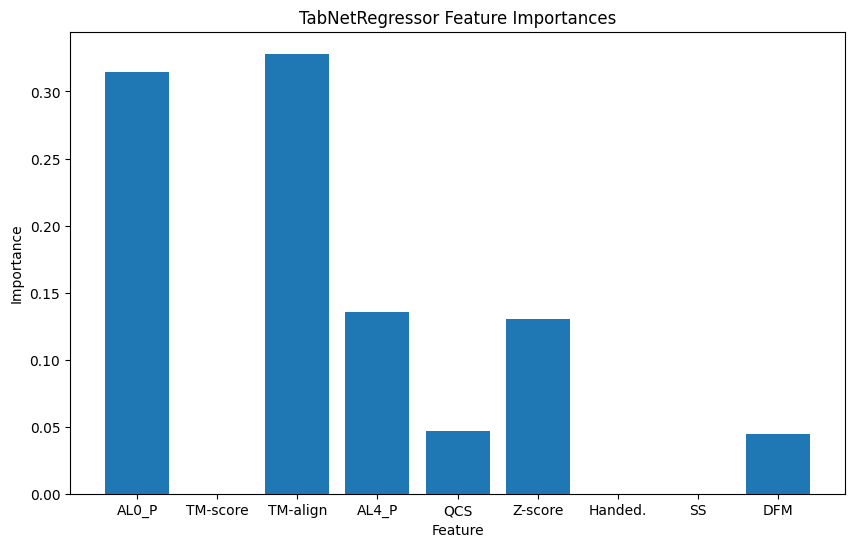

In [22]:
feature_importances = clf.feature_importances_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('TabNetRegressor Feature Importances')
plt.show()

In [23]:
y_train_reg = y_train.values.reshape(-1, 1)
y_test_reg = y_test.values.reshape(-1, 1)
clf = TabNetRegressor(seed = 1)  #TabNetRegressor()
clf.fit(
  X_train.values, y_train_reg,
  eval_set=[(X_train.values, y_train_reg),(X_test.values, y_test_reg)],
  batch_size=32, virtual_batch_size=32,
  max_epochs = 50,
  eval_metric=['mae'],
  patience = 10

)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2027.91535| val_0_mae: 14.60391| val_1_mae: 14.96631|  0:00:02s
epoch 1  | loss: 54.69417| val_0_mae: 8.21873 | val_1_mae: 8.29313 |  0:00:06s
epoch 2  | loss: 35.43464| val_0_mae: 7.99732 | val_1_mae: 8.01661 |  0:00:09s
epoch 3  | loss: 33.71962| val_0_mae: 3.16491 | val_1_mae: 3.30538 |  0:00:12s
epoch 4  | loss: 36.21194| val_0_mae: 4.44904 | val_1_mae: 4.6264  |  0:00:14s
epoch 5  | loss: 26.41213| val_0_mae: 4.03637 | val_1_mae: 4.18184 |  0:00:17s
epoch 6  | loss: 26.88203| val_0_mae: 4.08841 | val_1_mae: 4.34526 |  0:00:21s
epoch 7  | loss: 25.85157| val_0_mae: 2.55631 | val_1_mae: 2.59134 |  0:00:24s
epoch 8  | loss: 23.77672| val_0_mae: 3.07459 | val_1_mae: 3.09224 |  0:00:26s
epoch 9  | loss: 26.11238| val_0_mae: 3.35317 | val_1_mae: 3.5069  |  0:00:29s
epoch 10 | loss: 23.1948 | val_0_mae: 4.0368  | val_1_mae: 4.24615 |  0:00:32s
epoch 11 | loss: 21.11357| val_0_mae: 2.70323 | val_1_mae: 2.72835 |  0:00:36s
epoch 12 | loss: 25.81932| val_0_mae: 2.88214 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


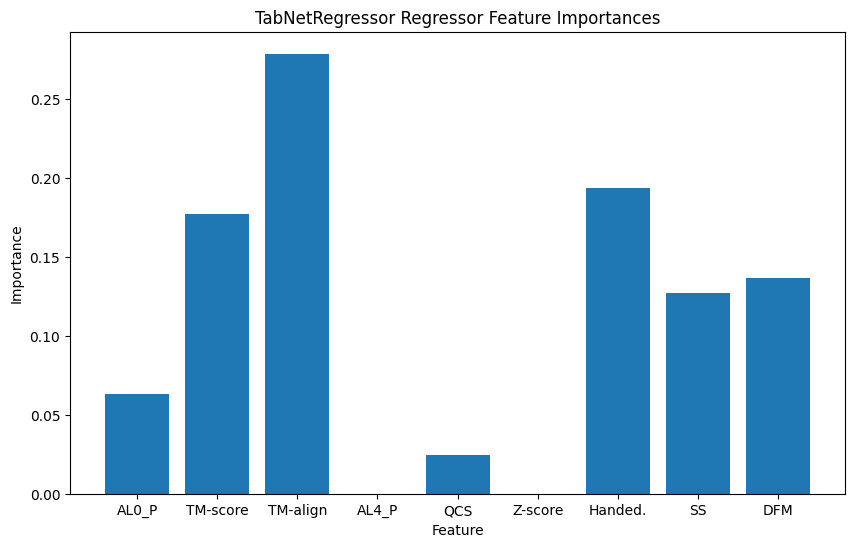

In [24]:
feature_importances = clf.feature_importances_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('TabNetRegressor Regressor Feature Importances')
plt.show()

In [25]:
y_train_reg = y_train.values.reshape(-1, 1)
y_test_reg = y_test.values.reshape(-1, 1)
clf = TabNetRegressor(seed = 2)  #TabNetRegressor()
clf.fit(
  X_train.values, y_train_reg,
  eval_set=[(X_train.values, y_train_reg),(X_test.values, y_test_reg)],
  batch_size=32, virtual_batch_size=32,
  max_epochs = 50,
  eval_metric=['mae'],
  patience = 10

)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 2526.77535| val_0_mae: 25.29255| val_1_mae: 24.89737|  0:00:02s
epoch 1  | loss: 46.2617 | val_0_mae: 5.93716 | val_1_mae: 5.81739 |  0:00:06s
epoch 2  | loss: 37.97551| val_0_mae: 3.79091 | val_1_mae: 3.75191 |  0:00:09s
epoch 3  | loss: 32.40564| val_0_mae: 2.78862 | val_1_mae: 2.81639 |  0:00:12s
epoch 4  | loss: 27.90626| val_0_mae: 2.41405 | val_1_mae: 2.48826 |  0:00:15s
epoch 5  | loss: 30.94985| val_0_mae: 3.73696 | val_1_mae: 3.84033 |  0:00:18s
epoch 6  | loss: 27.46707| val_0_mae: 4.9994  | val_1_mae: 5.25152 |  0:00:21s
epoch 7  | loss: 27.37711| val_0_mae: 2.77258 | val_1_mae: 2.80355 |  0:00:24s
epoch 8  | loss: 26.80638| val_0_mae: 2.80875 | val_1_mae: 2.89161 |  0:00:27s
epoch 9  | loss: 24.4165 | val_0_mae: 3.80399 | val_1_mae: 4.01136 |  0:00:30s
epoch 10 | loss: 23.82288| val_0_mae: 2.75291 | val_1_mae: 2.90796 |  0:00:33s
epoch 11 | loss: 19.99724| val_0_mae: 2.4043  | val_1_mae: 2.3263  |  0:00:36s
epoch 12 | loss: 20.32517| val_0_mae: 2.28389 | va

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


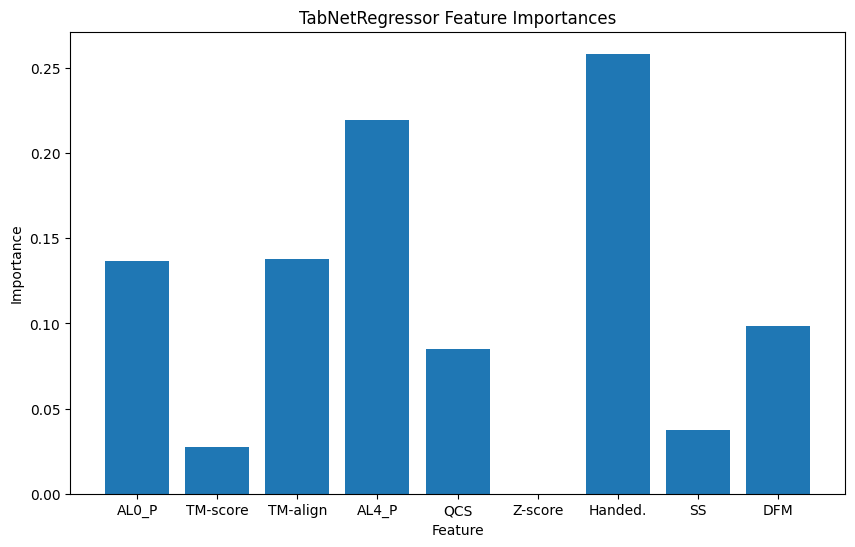

In [26]:
feature_importances = clf.feature_importances_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(X_train.columns, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('TabNetRegressor Feature Importances')
plt.show()